# CS 559 HW 4

# Naive Bayes Classification

In [14]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples = 400, n_features = 5, centers = 4, cluster_std = 2, random_state = 100)

Compute the prior probability of each class, p(Ck).

In [15]:
import numpy as np
unique, counts = np.unique(y, return_counts=True)
prior_prob = counts / len(y)
print("Prior probabilities:", prior_prob)

Prior probabilities: [0.25 0.25 0.25 0.25]


Compute the likelihood p(X|Ck)

In [22]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X, y)
likelihoods = gaussian.predict_proba(X)
print("Likelihoods:\n", likelihoods)

Likelihoods:
 [[6.51680907e-15 8.72628327e-32 2.47694412e-19 1.00000000e+00]
 [9.84034701e-12 1.09157445e-22 1.00000000e+00 3.35547247e-24]
 [1.00000000e+00 1.05759486e-24 4.57217258e-19 3.14708195e-15]
 ...
 [1.06160227e-14 4.76266506e-25 2.46406263e-15 1.00000000e+00]
 [1.88263341e-13 2.53543174e-24 1.00000000e+00 1.42063863e-17]
 [1.49403058e-10 2.01339025e-21 1.96419717e-10 1.00000000e+00]]


Compute the posterior probability of each point p(Ck|X). Assign the class ID to
each point.

In [23]:
posterior_prob = likelihoods * priors
posterior_prob /= posterior_prob.sum(axis=1, keepdims=True)
print("Posterior probabilities:\n", posterior_prob)

Posterior probabilities:
 [[6.51680907e-15 8.72628327e-32 2.47694412e-19 1.00000000e+00]
 [9.84034701e-12 1.09157445e-22 1.00000000e+00 3.35547247e-24]
 [1.00000000e+00 1.05759486e-24 4.57217258e-19 3.14708195e-15]
 ...
 [1.06160227e-14 4.76266506e-25 2.46406263e-15 1.00000000e+00]
 [1.88263341e-13 2.53543174e-24 1.00000000e+00 1.42063863e-17]
 [1.49403058e-10 2.01339025e-21 1.96419717e-10 1.00000000e+00]]


Construct the confusion matrix to show the classification rate

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_posterior = np.argmax(posterior_prob, axis=1)
conf_matrix = confusion_matrix(y, y_pred_posterior)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[100   0   0   0]
 [  0 100   0   0]
 [  0   0 100   0]
 [  0   0   0 100]]


Classify the target using sklearn.native bayes.GaussianNB. Report the accuracy
of the model.

In [25]:
y_pred_gaussian = gaussian.predict(X)
accuracy = accuracy_score(y, y_pred_gaussian)
print("Accuracy of GaussianNB:", accuracy)

Accuracy of GaussianNB: 1.0


# Logistic Regression Regularization

Regularize a Sklearn.linear model.LogisticRegression model with a hyperparameter
penalty=’l1’ (Lasso regularization). In the regularization validation, there is a hyperparameter to be concerned about. The model needs to be trained iteratively by tunning a
hyperparameter, C= λ−1, whose default value is 1. A hyperparameter solver=’saga’,
which is one of the fastest convergence solvers for any regularization in LogisticRegression(),
must be used when ’l1’ penalty parameter is used

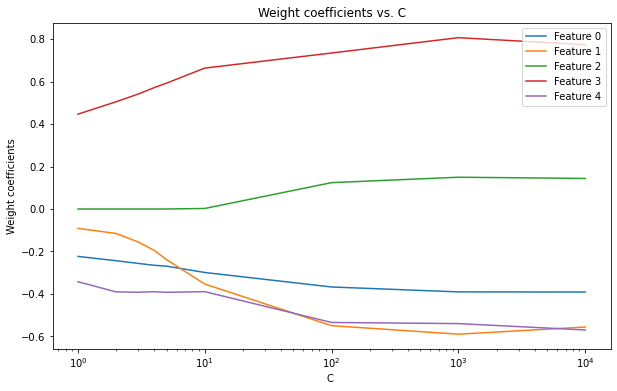

In [60]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

C_values = [1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 100.0, 1000.0, 10000.0]
weights = []

for C in C_values:
    clf = LogisticRegression(penalty='l1', solver='saga', C=C, max_iter=10000)
    clf.fit(X, y)
    weights.append(clf.coef_[0])

weights = np.array(weights)

plt.figure(figsize=(10, 6))
for i in range(weights.shape[1]):
    plt.plot(C_values, weights[:, i], label=f'Feature {i}')
plt.xscale('log')
plt.xlabel('C ')
plt.ylabel('Weight coefficients')
plt.title('Weight coefficients vs. C')
plt.legend()
plt.show()


Explain which feature is the most important in each class

In [61]:
most_important_feature_index = np.argmax(np.abs(clf.coef_[0]))
most_important_feature_value = coefficients[most_important_feature_index]

print(f"The most important feature is feature {most_important_feature_index} with a coefficient value of {most_important_feature_value}.")


The most important feature is feature 3 with a coefficient value of 0.4458940341529721.


Feature 3 is the most important as it has the highest absolute weight

Do a similar as done in a) to show that Ridge regularization (penalty=’l2’) does not
provide a sparse solution

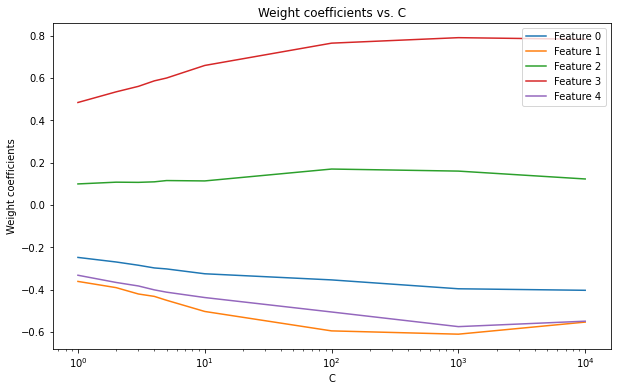

In [64]:
weights_l2 = []

for C in C_values:
    clf = LogisticRegression(penalty='l2', solver='saga', C=C, max_iter=10000)
    clf.fit(X, y)
    weights_l2.append(clf.coef_[0])

weights_l2 = np.array(weights_l2)

plt.figure(figsize=(10, 6))
for i in range(weights_l2.shape[1]):
    plt.plot(C_values, weights_l2[:, i], label=f'Feature {i}')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Weight coefficients')
plt.title('Weight coefficients vs. C')
plt.legend()
plt.show()


l2 Does not provide a sparse solution